In [3]:
import json
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import seaborn as sns
sns.set_style("white")
sns.set_context("talk", font_scale=1.4)
import sys
sys.path.append('../')
from Misc import syn_data_gen, save_load_files
from GPCollabPrefAct import collab_gpmc

In [4]:
num_latent_gps = 3

In [5]:
num_data = 5
# Specific occupants 6, 7, 8 actions
specific_occ_actions_data_list = []
specific_occ_actions_data_norm_list = []
for i in xrange(21):
    occ_num = i + 1
    print "Occupant number:"
    print occ_num
    config_file = '../data/config_files/syn/diff_utilities_config/syn_occupants.json'
    with open(config_file, 'r') as fd:
        config = json.loads(fd.read())

    a = config['O' + str(occ_num)]['a']
    b = config['O' + str(occ_num)]['b']
    
    # Load actions data
    actions_data = np.loadtxt('../data/syn_data/syn_occ/actions_data/train/' +
                         'O_a' + str(a) + '_b' + str(b) + '_' + str(num_data) + '_.csv', delimiter = ',')
    
    actions_data_norm = (actions_data - 0.5)/0.5
    
    specific_occ_actions_data_list.append(actions_data)
    specific_occ_actions_data_norm_list.append(actions_data_norm) 

all_x_grid = np.linspace(0,1,50)

Occupant number:
1
Occupant number:
2
Occupant number:
3
Occupant number:
4
Occupant number:
5
Occupant number:
6
Occupant number:
7
Occupant number:
8
Occupant number:
9
Occupant number:
10
Occupant number:
11
Occupant number:
12
Occupant number:
13
Occupant number:
14
Occupant number:
15
Occupant number:
16
Occupant number:
17
Occupant number:
18
Occupant number:
19
Occupant number:
20
Occupant number:
21


In [6]:
all_x_grid = np.linspace(0,1,50)
all_x_grid_norm = (all_x_grid - 0.5)/0.5

# Collaborative Preference Learning Model Setup

In [7]:
latent_gps_kerns_list = [gpflow.kernels.RBF(1)]*num_latent_gps

In [8]:
#def __init__(self, actions_list, kerns_list, X_grid)
m = collab_gpmc.GPCollabPrefLearnGPMC(specific_occ_actions_data_norm_list, latent_gps_kerns_list, all_x_grid_norm)

In [9]:
for i in xrange(len(latent_gps_kerns_list)):
    m.kerns_list[i].lengthscales.prior = gpflow.priors.Gamma(1., 1.)
    m.kerns_list[i].variance.prior = gpflow.priors.Gamma(1., 1.)

In [10]:
m.W.prior = gpflow.priors.Gaussian(0,1)

In [11]:
m.optimize(maxiter=5000) # start near MAP

      fun: array([ 240.18239399])
 hess_inv: <219x219 LbfgsInvHessProduct with dtype=float64>
      jac: array([  2.16067705e-04,   8.61278526e-05,  -6.63847015e-05,
        -1.13007632e-04,  -2.45150005e-04,  -1.50521319e-04,
        -9.16067131e-05,  -1.19395321e-04,  -6.30011859e-05,
         4.30280278e-05,   9.76736396e-05,   9.27586075e-05,
         7.89146907e-05,   6.96656528e-05,   5.92797718e-05,
         7.10905260e-06,  -7.09520748e-05,  -1.44213499e-04,
        -1.83186658e-04,  -2.05970944e-04,  -2.02116916e-04,
        -1.95037648e-04,  -1.77189730e-04,  -1.24234389e-04,
        -8.30039614e-05,  -6.00424300e-05,  -6.04818491e-05,
        -4.36957445e-05,  -3.76072018e-05,  -1.96847495e-05,
        -1.64593722e-06,   4.24723920e-05,   8.79744866e-05,
         1.29986484e-04,   1.78256204e-04,   1.96511178e-04,
         1.97786426e-04,   1.86946698e-04,   1.55377654e-04,
         1.03086210e-04,   5.56298087e-05,   1.31061979e-05,
        -1.61022454e-05,  -4.21382429e-05

In [12]:
m

Name,values,prior,constraint
collaborative_pref_gps.V_h,[[ -2.53009728e-01 4.72485670e-01 3.39081730e-01 3.09853543e-01 4.58346227e-01 4.82877221e-01 4.87469470e-01 5.01733939e-01 4.43706727e-01 3.40964351e-01 2.34008208e-01 1.14397842e-01 5.42703769e-04 -1.10745840e-01 -1.88494020e-01 -2.34823055e-01 -2.53535981e-01 -2.36964902e-01 -1.87696298e-01 -1.19932614e-01 -3.70277148e-02 4.11325340e-02 1.21631844e-01 1.81344110e-01 2.28132696e-01 2.64345684e-01 2.90263099e-01 2.93335624e-01 2.83571472e-01 2.53546738e-01 1.90408082e-01 1.09585728e-01 4.15622722e-03 -1.11425142e-01 -2.38086162e-01 -3.49626007e-01 -4.39704702e-01 -4.92387787e-01 -5.10072279e-01 -4.93196821e-01 -4.42933815e-01 -3.70563774e-01 -2.90646799e-01 -2.07510992e-01 -1.42756225e-01 -7.75636189e-02 -4.38317718e-02 -1.89800297e-02 -4.48456814e-03 -4.53034818e-03] [ 1.05774883e+00 6.28639942e-01 3.08310055e-02 -1.17028139e-01 -2.32571734e-01 -2.55971334e-01 -2.39139324e-01 -2.43541986e-01 -2.39838727e-01 -2.40751691e-01 -2.64835691e-01 -2.98477452e-01 -3.40435212e-01 -3.81782880e-01 -4.20046633e-01 -4.61073712e-01 -4.79463090e-01 -4.87941949e-01 -4.94533278e-01 -4.93388197e-01 -4.88397937e-01 -4.74687266e-01 -4.54693101e-01 -4.04921633e-01 -3.48822614e-01 -2.74685426e-01 -1.86640997e-01 -7.92176161e-02 2.81152064e-02 1.33615589e-01 2.43437484e-01 3.26047155e-01 3.90679287e-01 4.34078489e-01 4.36814417e-01 4.20700961e-01 3.81010236e-01 3.27863234e-01 2.58488468e-01 1.98233703e-01 1.32978019e-01 8.95319853e-02 6.27992347e-02 3.55697006e-02 1.57543723e-02 1.04120101e-02 9.46652889e-03 8.66521049e-03 8.04058760e-03 -4.15432079e-04] [ -1.09382050e+00 -4.25748321e-01 -4.87077357e-01 -2.93495143e-01 -2.81137426e-01 -2.40598188e-01 -2.07360767e-01 -1.99797392e-01 -1.92572095e-01 -1.74544438e-01 -1.55764775e-01 -1.21713736e-01 -8.42885234e-02 -5.42626470e-02 -2.72881385e-02 -1.07059147e-02 1.32270323e-02 3.68957042e-02 5.88907299e-02 9.91500067e-02 1.53706138e-01 2.27855090e-01 3.14220791e-01 3.98028063e-01 4.90955594e-01 5.56458272e-01 5.97143255e-01 6.01581122e-01 5.76424667e-01 5.27936980e-01 4.55105252e-01 3.96752812e-01 3.40097949e-01 2.96434408e-01 2.75918952e-01 2.64225227e-01 2.50842668e-01 2.38667379e-01 2.19423492e-01 1.79687166e-01 1.31755015e-01 7.58030856e-02 2.36217326e-02 -1.39432754e-02 -3.29636691e-02 -4.31581013e-02 -3.37525824e-02 -2.65943077e-02 -1.37737765e-02 -1.62556790e-03]],"N([ 0.],[ 1.])",(none)
collaborative_pref_gps.W,[[ 0.62119661 0.68134945 -0.00631962] [-0.18406459 0.08434485 -0.84738272] [ 0.46003935 -0.13634164 -0.79253288] [ 0.35134357 0.04148704 -0.64074148] [-0.71088217 0.25090452 0.31859879] [-0.42308274 -0.21138374 0.59585947] [ 0.46226301 -0.60599307 -0.42764766] [ 0.37199324 -0.48049556 -0.07053074] [ 0.28416145 0.40149482 0.59923025] [ 0.67173371 -0.2528844 0.50053871] [ 0.21324464 -0.98613733 0.01032987] [ 0.30424592 -0.65134227 0.03026348] [ 0.31708984 0.00533638 0.97673843] [-0.02293394 -0.61159517 0.58092531] [ 0.3467544 -0.5608441 0.46548984] [-0.06934933 -1.03797326 0.15352634] [ 0.01778254 -0.7617256 -0.02929627] [-0.04034927 -0.56264803 0.74353647] [ 0.88438446 -0.29790138 -0.1968564 ] [ 0.81997074 -0.16203059 -0.10880018] [ 0.31186165 -0.63659448 0.24798286]],"N([ 0.],[ 1.])",(none)
collaborative_pref_gps.kerns_list.item0.lengthscales,[ 0.24992809],"Ga([ 1.],[ 1.])",+ve
collaborative_pref_gps.kerns_list.item0.variance,[ 2.76152634],"Ga([ 1.],[ 1.])",+ve
collaborative_pref_gps.kerns_list.item0.lengthscales,[ 0.24992809],"Ga([ 1.],[ 1.])",+ve
collaborative_pref_gps.kerns_list.item0.variance,[ 2.76152634],"Ga([ 1.],[ 1.])",+ve
collaborative_pref_gps.kerns_list.item0.lengthscales,[ 0.24992809],"Ga([ 1.],[ 1.])",+ve
collaborative_pref_gps.kerns_list.item0.variance,[ 2.76152634],"Ga([ 1.],[ 1.])",+ve


In [13]:
samples = m.sample(1000, verbose=True, epsilon=0.02, thin = 2, burn = 500, Lmax = 40)

burn-in sampling started
Iteration:  100 	 Acc Rate:  97.0 %
Iteration:  200 	 Acc Rate:  100.0 %
Iteration:  300 	 Acc Rate:  99.0 %
Iteration:  400 	 Acc Rate:  99.0 %
Iteration:  500 	 Acc Rate:  100.0 %
burn-in sampling ended
Iteration:  100 	 Acc Rate:  96.0 %
Iteration:  200 	 Acc Rate:  100.0 %
Iteration:  300 	 Acc Rate:  100.0 %
Iteration:  400 	 Acc Rate:  99.0 %
Iteration:  500 	 Acc Rate:  100.0 %
Iteration:  600 	 Acc Rate:  100.0 %
Iteration:  700 	 Acc Rate:  99.0 %
Iteration:  800 	 Acc Rate:  100.0 %
Iteration:  900 	 Acc Rate:  100.0 %
Iteration:  1000 	 Acc Rate:  100.0 %
Iteration:  1100 	 Acc Rate:  100.0 %
Iteration:  1200 	 Acc Rate:  99.0 %
Iteration:  1300 	 Acc Rate:  100.0 %
Iteration:  1400 	 Acc Rate:  99.0 %
Iteration:  1500 	 Acc Rate:  100.0 %
Iteration:  1600 	 Acc Rate:  100.0 %
Iteration:  1700 	 Acc Rate:  99.0 %
Iteration:  1800 	 Acc Rate:  98.0 %
Iteration:  1900 	 Acc Rate:  100.0 %
Iteration:  2000 	 Acc Rate:  100.0 %


# Predict latent GPs Hs and Ws - Fully Bayesian

In [14]:
min_grid = 0.
max_grid = 1.
num_grid = 20

Xt = np.linspace(min_grid, max_grid, 2*num_grid)
Xt_norm = (Xt - 0.5)/0.5
Xt1 = np.linspace(min_grid, max_grid, num_grid)
Xt2 = np.linspace(min_grid, max_grid, num_grid)

Xtt1, Xtt2 = np.meshgrid(Xt1, Xt2)
X_grid = np.zeros(shape =(np.ravel(Xtt1).shape[0],2))
X_grid[:,0] = np.ravel(Xtt1) 
X_grid[:,1] = np.ravel(Xtt2)

X_grid_norm = (X_grid - 0.5)/0.5
num_feat = X_grid_norm.shape[1]/2

In [15]:
# Finding the posterior preference probabilities at the grid points
X_grid_norm_concat = np.vstack([X_grid_norm[:,:num_feat], X_grid_norm[:,num_feat:]])

In [16]:
def multi_normal_samples(mu, std, num_samples):
    """
    Sampling from a normal distribution with multiple mean and std
    """
    samples = np.array([])
    for i in xrange(mu.shape[0]):
        sample = np.random.normal(mu[i], std[i], num_samples)
        samples = np.append(samples, sample)
    return samples

def h_all_samples(mu_list, var_list):
    """
    Utility samples for all concerned occupants
    Inputs:
    mu_list : list of mean utility values for all occupants len(mu_list) = num of occupants
    var_list : list of variance associated with utility values for all occupants
    """
    h_samples_mat = np.zeros((len(mu_list), mu_list[0].shape[0]))
    for i in xrange(len(mu_list)):
        mu = mu_list[i]
        #print mu.shape
        var = var_list[i]
        #print var.shape
        std = np.sqrt(var)
        h_sample = multi_normal_samples(mu, std, 1)
        #print u_sample
        h_samples_mat[i] = h_sample
    return h_samples_mat

In [17]:
def utility_samples_all_occupants(mu_list, var_list):
    """
    Utility samples for all concerned occupants
    Inputs:
    mu_list : list of mean utility values for all occupants len(mu_list) = num of occupants
    var_list : list of variance associated with utility values for all occupants
    """
    u_samples_mat = np.zeros((len(mu_list), mu_list[0].shape[0]))
    for i in xrange(len(mu_list)):
        mu = mu_list[i]
        #print mu.shape
        var = var_list[i]
        #print var.shape
        std = np.sqrt(var)
        u_sample = multi_normal_samples(mu, std, 1)
        #print u_sample
        u_samples_mat[i] = u_sample
    return u_samples_mat

In [18]:
from scipy.stats import norm

u_list = []
h_list = []
w_list = []
p_list = []
for s in samples:
    m.set_state(s)
    mu_list, var_list = m.predict_h(X_grid_norm_concat)
    h_all_occ = utility_samples_all_occupants(mu_list, var_list)
    W = m.W.value 
    u = np.dot(W, h_all_occ)
    num_datapoints = u.shape[1]
    u1 = u[:,:num_datapoints/2]
    u2 = u[:,num_datapoints/2:]
    u_diff = u2 - u1
    p = norm.cdf(u_diff)
    
    h_list.append(h_all_occ)
    w_list.append(W)
    u_list.append(u)
    p_list.append(p)

In [19]:
h_all_mat = np.asarray(h_list)
w_all_mat = np.asarray(w_list)
u_all_mat = np.asarray(u_list)
p_all_mat = np.asarray(p_list)

In [20]:
p_all_mean_mat = np.mean(p_all_mat, axis = 0)
p_all_std_mat = np.std(p_all_mat, axis = 0)

# Plot and save pref probabilities for all occupants

In [21]:
mean_levels = np.linspace(0,1.)
std_levels = np.linspace(0,.4)

for i in xrange(21):
    occ_num = i + 1
    a = config['O' + str(occ_num)]['a']
    b = config['O' + str(occ_num)]['b']
    # Load actions data
    actions_data = np.loadtxt('../data/syn_data/syn_occ/actions_data/train/' +
                         'O_a' + str(a) + '_b' + str(b) + '_' + str(num_data) + '_.csv', delimiter = ',')
    X_current = actions_data[:,1]
    X_previous = actions_data[:,0]
    
    plt.figure(figsize=(12,10))
    mean_reshape = p_all_mean_mat[i,:].reshape((num_grid, num_grid), order='F')
    c = plt.contourf(Xt1,Xt1,mean_reshape.T,
                     mean_levels, cmap=plt.cm.Blues)
    plt.scatter(X_previous,X_current, marker = '.', c = 'r', s = 200, alpha = 1)
    plt.colorbar(c)
    plt.xlabel('Before Action')
    plt.ylabel('After Action')
    plt.title('Mean Predicted Preference Probability ; Occupant:' + str(i))
    # + 'O_a' + str(a) + '_b' + str(b) + '_' + str(num_data)
    plt.savefig(('../data/syn_data/results/collab/CM'
                 + 'O_a' + str(a) + '_b' + str(b) +
                 '_n_' + str(num_data) + '_h_' + str(num_latent_gps) + '_.png'), dpi = 300)
    plt.close()
    plt.figure(figsize=(12,10))
    std_reshape = p_all_std_mat[i,:].reshape((num_grid, num_grid), order='F')
    
    c_v = plt.contourf(Xt1,Xt1,std_reshape.T,
                 std_levels, cmap=plt.cm.Blues)
    
    plt.scatter(X_previous,X_current, marker = '.', c = 'r', s = 200, alpha = 1)
    plt.colorbar(c_v)
    plt.xlabel('Before Action')
    plt.ylabel('After Action')
    plt.title('Std Predicted Preference Probability ; Occupant:' + str(i))
    plt.savefig(('../data/syn_data/results/collab/CV'
                 + 'O_a' + str(a) + '_b' + str(b) +
                 '_n_' + str(num_data) + '_h_' + str(num_latent_gps) + '_.png'), dpi = 300)
    plt.close()
    

# Occupant 

Text(0.5,1,u'Std Predicted Preference Probability Contour Plot')

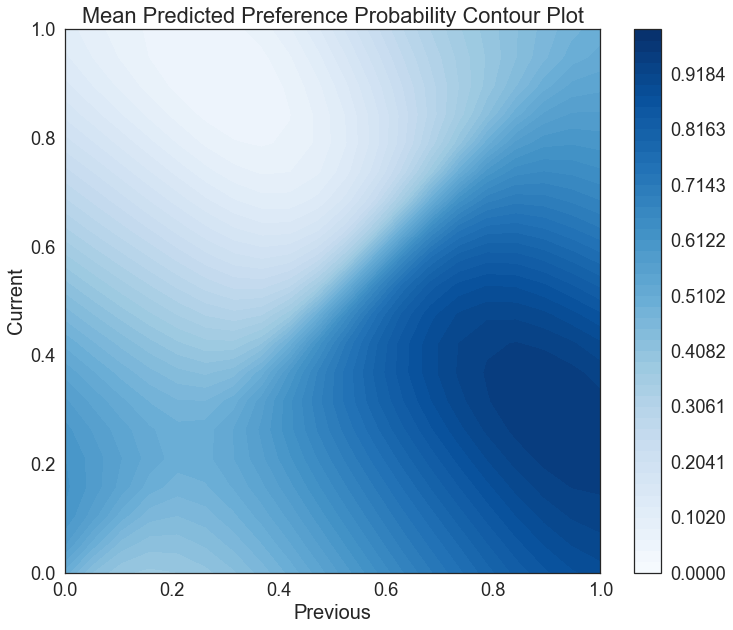

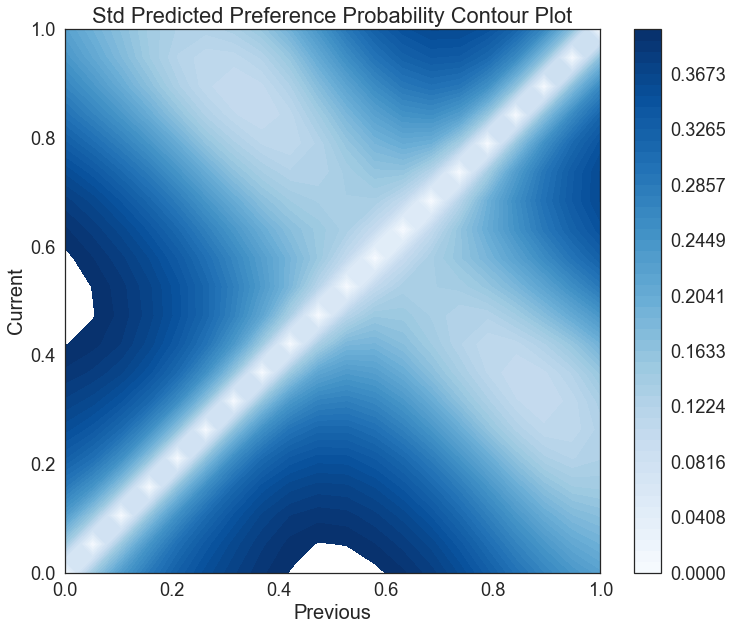

In [35]:
ii = 3

mean_levels = np.linspace(0,1.)

plt.figure(figsize=(12,10))
mean_reshape = p_all_mean_mat[ii,:].reshape((num_grid, num_grid), order='F')
c = plt.contourf(Xt1,Xt1,mean_reshape.T,
                 mean_levels, cmap=plt.cm.Blues)
plt.colorbar(c)
plt.xlabel('Previous')
plt.ylabel('Current')
plt.title('Mean Predicted Preference Probability Contour Plot')

levels = np.linspace(0,.4)
plt.figure(figsize=(12,10))
mean_reshape = p_all_std_mat[ii,:].reshape((num_grid, num_grid), order='F')
c = plt.contourf(Xt1,Xt1,mean_reshape.T,
                 levels, cmap=plt.cm.Blues)
plt.colorbar(c)
plt.xlabel('Previous')
plt.ylabel('Current')
plt.title('Std Predicted Preference Probability Contour Plot')

# Occupant 2

Text(0.5,1,u'Mean Predicted Preference Probability Contour Plot')

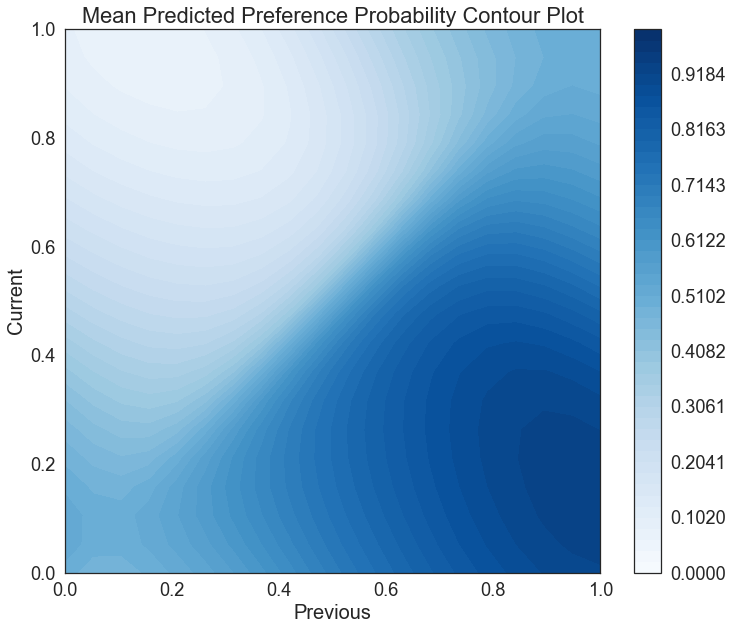

In [24]:
mean_levels = np.linspace(0,1.)
plt.figure(figsize=(12,10))
mean_reshape = p_all_mean_mat[1,:].reshape((num_grid, num_grid), order='F')
c = plt.contourf(Xt1,Xt1,mean_reshape.T,
                 mean_levels, cmap=plt.cm.Blues)
plt.colorbar(c)
plt.xlabel('Previous')
plt.ylabel('Current')
plt.title('Mean Predicted Preference Probability Contour Plot')

Text(0.5,1,u'Std Predicted Preference Probability Contour Plot')

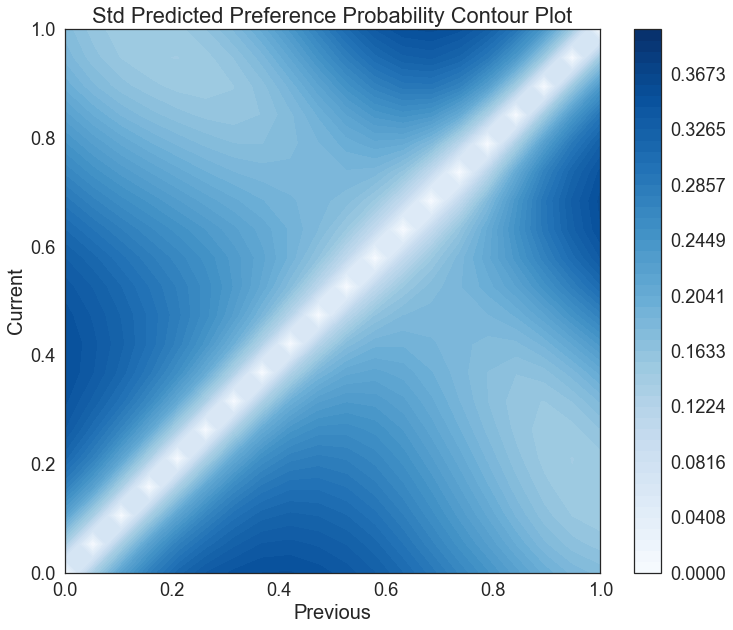

In [25]:
levels = np.linspace(0,.4)
plt.figure(figsize=(12,10))
mean_reshape = p_all_std_mat[1,:].reshape((num_grid, num_grid), order='F')
c = plt.contourf(Xt1,Xt1,mean_reshape.T,
                 levels, cmap=plt.cm.Blues)
plt.colorbar(c)
plt.xlabel('Previous')
plt.ylabel('Current')
plt.title('Std Predicted Preference Probability Contour Plot')

# Occupant 3

Text(0.5,1,u'Mean Predicted Preference Probability Contour Plot')

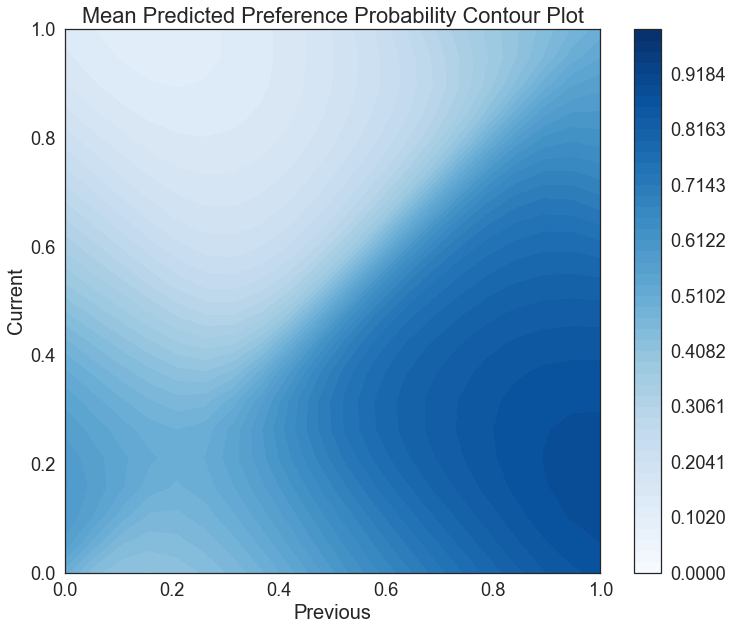

In [26]:
mean_levels = np.linspace(0,1.)
plt.figure(figsize=(12,10))
mean_reshape = p_all_mean_mat[2,:].reshape((num_grid, num_grid), order='F')
c = plt.contourf(Xt1,Xt1,mean_reshape.T,
                 mean_levels, cmap=plt.cm.Blues)
plt.colorbar(c)
plt.xlabel('Previous')
plt.ylabel('Current')
plt.title('Mean Predicted Preference Probability Contour Plot')

Text(0.5,1,u'Std Predicted Preference Probability Contour Plot')

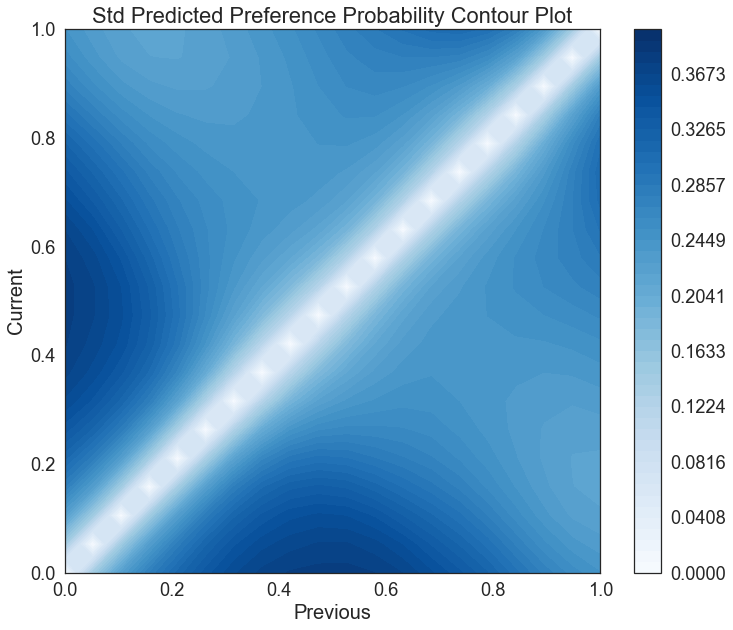

In [27]:
levels = np.linspace(0,.4)
plt.figure(figsize=(12,10))
mean_reshape = p_all_std_mat[2,:].reshape((num_grid, num_grid), order='F')
c = plt.contourf(Xt1,Xt1,mean_reshape.T,
                 levels, cmap=plt.cm.Blues)
plt.colorbar(c)
plt.xlabel('Previous')
plt.ylabel('Current')
plt.title('Std Predicted Preference Probability Contour Plot')